## Importing Packages

In [569]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Creating Dataframes from csv files

In [305]:
contestant_table = pd.read_csv("datasets/contestant_table.csv") ## data about contestants
season_table = pd.read_csv("datasets/season_table.csv") ## data about seasons
tribe_table = pd.read_csv("datasets/tribe_table.csv") ## data about tribes

In [415]:
contestant_table = pd.get_dummies(contestant_table, columns=['gender'], prefix='gender')
contestant_table.describe()

,age,num_season,finish,african_american,asian_american,latin_american,poc,jewish,muslim,lgbt,...,num_boot,quit,evac,ejected,fmc,num_jury_votes,normalized_finish,gender_F,gender_M,gender_N
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,...,785.000000,785.000000,785.000000,785.000000,785.000000,114.000000,785.000000,785.000000,785.000000,785.000000
mean,33.410191,22.547771,9.682803,0.145223,0.078981,0.080255,0.294268,0.045860,0.005096,0.082803,...,9.698089,0.016561,0.021656,0.001274,0.020382,3.192982,0.473011,0.498089,0.500637,0.001274
std,10.098363,12.241952,5.381376,0.352550,0.269881,0.271860,0.456003,0.209314,0.071246,0.275759,...,5.382493,0.127699,0.145651,0.035692,0.141394,2.896067,0.288981,0.500315,0.500318,0.035692
min,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.222222,0.000000,0.000000,0.000000
50%,31.000000,23.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.473684,0.000000,1.000000,0.000000
75%,40.000000,33.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.722222,1.000000,1.000000,0.000000
max,75.000000,43.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,12.000000,0.950000,1.000000,1.000000,1.000000


# **Contestant Table Variables**
* **contestant_name**: Name of contestant
* **age**: Age of contestant
* **hometown**: Contestant's hometown
* **profession**: Contestant's profession
* **num_season**: Number of season that the contestant was on
* **finish**: Contestant's placement 
* **gender**: Contestant's gender (M = Male, F = Female)
* **african_american**: If a player is African American (0 = no, 1 = yes)
* **asian_american**: If a player is Asian American (0 = no, 1 = yes)
* **latin_american**: If a player is Latin American (0 = no, 1 = yes)
* **poc**: If a player is a person of color (0 = no, 1 = yes)
* **jewish**: If a player is Jewish (0 = no, 1 = yes)
* **muslim**: If a player is Muslim (0 = no, 1 = yes)
* **lgbt**: If a player is a confirmed member of the LGBT community (0 = no, 1 = yes)
* **state**: What state the player is from
* **country**: What country the player is from (US = United States of American, CA = Canada)
* **num_appearance**: Number of seasons the player has competed in
* **birthdate**: Birthdate of the player
* **merge**: If the player made the merge (0 = no, 1 = yes)
* **jury**: If the player was on the jury (0 = no, 1 = yes)
* **ftc**: If the player made ftc (0 = no, 1 = yes)
* **votes_against**: Number of votes cast against a player in the game
* **num_boot**: Number of boot
* **tribe1**: Contestant's first tribe 
* **tribe2**: Contestant's second tribe (Empty if no second tribe)
* **tribe3**: Contestant's third tribe (Empty if no third tribe)
* **quit**: If a player quit (0 = no, 1 = yes)
* **evac**: If a player was medically evacuated (0 = no, 1 = yes) 
* **ejected**: If a player was ejected from the game (0 = no, 1 = yes)
* **fmc**: If a player lost a firemaking challenge (0 = no, 1 = yes)
* **num_jury_votes**: Number of jury votes that a player received
* **normalized_finish**: Player's placement relative to number of players in their season

In [307]:
season_table.describe()

,num_season,num_merge,day_merge,num_jury,num_ftc,num_swaps,num_contestants,redemption_island,edge_of_extinction,num_days,african_american,asian_american,latin_american,poc,lgbt,jewish,muslim,num_quits,num_evacs
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,22.000000,11.093023,19.255814,8.441860,2.651163,0.860465,18.255814,0.069767,0.046512,38.162791,2.651163,1.441860,1.465116,5.372093,1.511628,0.837209,0.093023,0.302326,0.395349
std,12.556539,1.444430,3.266664,1.749862,0.482243,0.675468,1.528974,0.257770,0.213083,3.401192,1.360737,1.484881,1.436743,3.352492,1.202618,0.949442,0.293903,0.557840,0.760311
min,1.000000,8.000000,12.000000,7.000000,2.000000,0.000000,16.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.500000,10.000000,17.000000,7.000000,2.000000,0.000000,18.000000,0.000000,0.000000,39.000000,2.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,11.000000,19.000000,8.000000,3.000000,1.000000,18.000000,0.000000,0.000000,39.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,32.500000,12.000000,20.000000,9.000000,3.000000,1.000000,20.000000,0.000000,0.000000,39.000000,3.000000,2.000000,2.000000,6.500000,2.000000,1.000000,0.000000,0.500000,0.500000
max,43.000000,14.000000,27.000000,16.000000,3.000000,2.000000,20.000000,1.000000,1.000000,42.000000,6.000000,5.000000,6.000000,15.000000,5.000000,4.000000,1.000000,2.000000,3.000000


# **Season Table Variables**
* **num_season**: Chronological Season Number (1-43)
* **season**: Name of Season
* **merged_tribe**: Name of merged tribe
* **num_merge**: Number of players that made it to the merge
* **day_merge**: Day the merge tribe started
* **num_jury**: Number of players on jury
* **num_ftc**: Numer of players to make final tribal council
* **num_swaps**: Number of tribe swaps in the season
* **num_contestants**: Number of contestants 
* **redemption_island**: Redemption Island Twist (0 = not present, 1 = present)
* **edge_of_extinction**: Edge of Extinction Twist (0 = not present, 1 = present)
* **num_days**: Number of days that the game took place over (typically 39)
* **african_american**: Number of African American players in the season
* **asian_american**: Number of Asian American players in the season
* **latin_american**: Number of Latin American players in the season
* **poc**: Numer of people of color in the season
* **lgbt**: Number of confirmed LGBT players in the season
* **jewish**: Number of Jewish players in the season
* **muslim**: Number of Muslim players in the season
* **num_quits**: Number of quits in a season
* **num_evacs**: Number of medical evacuations in a season
* **winner**: The winner of the season

In [308]:
tribe_table.describe()

,num_season,iter_num,num_contestants,merge,african_american,asian_american,latin_american,poc,jewish,muslim,lgbt,male,female,non_binary
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,23.098214,1.241071,8.008929,0.191964,1.107143,0.611607,0.620536,2.254464,0.388393,0.031250,0.687500,4.098214,3.901786,0.008929
std,12.077448,0.839021,2.284656,0.394727,0.916781,0.876217,0.843720,1.689450,0.680312,0.174382,0.836727,1.606935,1.466883,0.094279
min,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,25.000000,1.000000,8.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000
75%,34.000000,2.000000,10.000000,0.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,5.000000,5.000000,0.000000
max,43.000000,3.000000,14.000000,1.000000,5.000000,5.000000,5.000000,9.000000,4.000000,1.000000,4.000000,9.000000,9.000000,1.000000


# **Tribe Table Variables**
* **num_season**: Number of season that tribe is on
* **tribe**: Name of the tribe
* **iter_num**: Version of the tribe (1 = first, 2 = second, 3 = third, 0 = merge)
* **merge**: If the tribe is the merge tribe (0 = no, 1 = yes)
* **african_american**: Number of African American players on tribe
* **asian_american**: Number of Asian American players on tribe
* **latin_american**: Number of Latin American players on tribe
* **poc**: Number of people of color on tribe
* **jewish**: Number of Jewish players on tribe 
* **muslim**: Number of Muslim players on tribe
* **lgbt**: Number of confirmed LGBT players on tribe
* **male**: Number of male players on tribe
* **female**: Number of female players on tribe
* **non_binary**: Number of non binary players on tribe
* **color**: Color of tribe

# Graphs for Data Visualization 

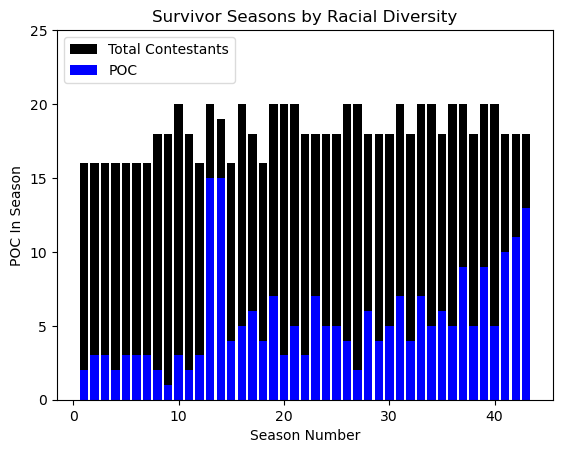

In [456]:
line1 = plt.bar(season_table.num_season, season_table.num_contestants, label='Total Contestants', color='black')
line2 = plt.bar(season_table.num_season, season_table.poc, label='POC', color='blue')
plt.ylim(0, 25)
plt.xlabel('Season Number')
plt.ylabel('POC In Season')
plt.title('Survivor Seasons by Racial Diversity')
plt.legend(handles=[line1, line2], loc='upper left', fontsize='medium', frameon=True, framealpha=0.7)
plt.show()

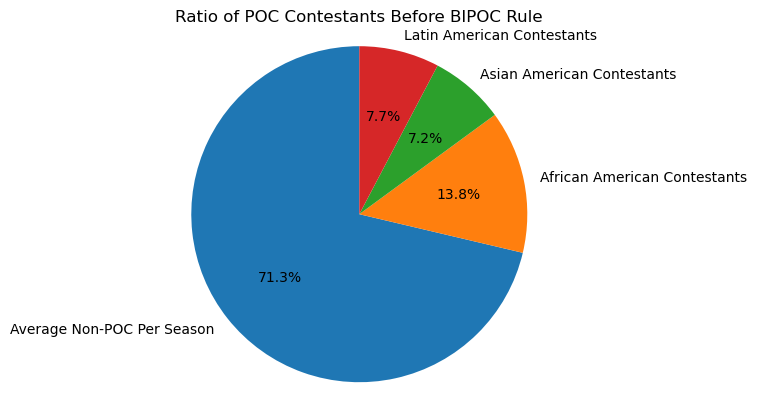

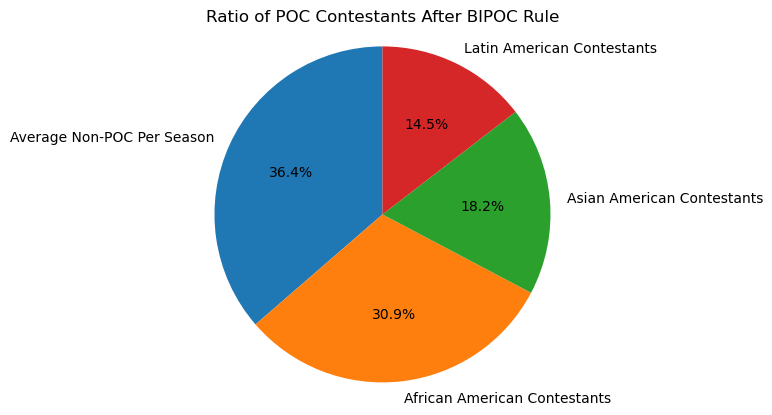

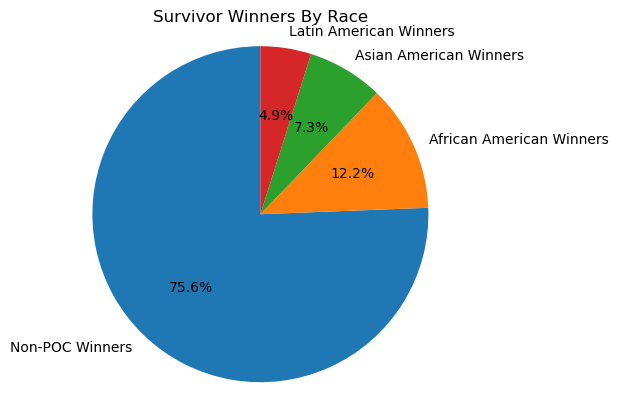

In [457]:
unique_contestants = contestant_table.drop_duplicates(subset='contestant_name')
unique_winners = contestant_table[contestant_table['finish'] == 1].drop_duplicates(subset='contestant_name')
after_41_contestants = unique_contestants[unique_contestants['num_season'] >= 41]
before_41_contestants = unique_contestants[unique_contestants['num_season'] < 41]
after_41_poc = after_41_contestants.poc.mean()
before_41_poc = before_41_contestants.poc.mean()
unique_winners = contestant_table[contestant_table['finish'] == 1].drop_duplicates(subset='contestant_name')

labels = ['Average Non-POC Per Season', 'African American Contestants', 'Asian American Contestants', 'Latin American Contestants']
sizes = [len(before_41_contestants)-before_41_contestants.poc.sum(), before_41_contestants.african_american.sum(), before_41_contestants.asian_american.sum(), before_41_contestants.latin_american.sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Ratio of POC Contestants Before BIPOC Rule")
plt.axis('equal')
plt.show()

labels = ['Average Non-POC Per Season', 'African American Contestants', 'Asian American Contestants', 'Latin American Contestants']
sizes = [len(after_41_contestants)-after_41_contestants.poc.sum(), after_41_contestants.african_american.sum(), after_41_contestants.asian_american.sum(), after_41_contestants.latin_american.sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Ratio of POC Contestants After BIPOC Rule")
plt.axis('equal')
plt.show()

labels = ['Non-POC Winners', 'African American Winners', 'Asian American Winners', 'Latin American Winners']
sizes = [len(unique_winners)-unique_winners.poc.sum(), unique_winners.african_american.sum(), unique_winners.asian_american.sum(), unique_winners.latin_american.sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Survivor Winners By Race")
plt.axis('equal')
plt.show()

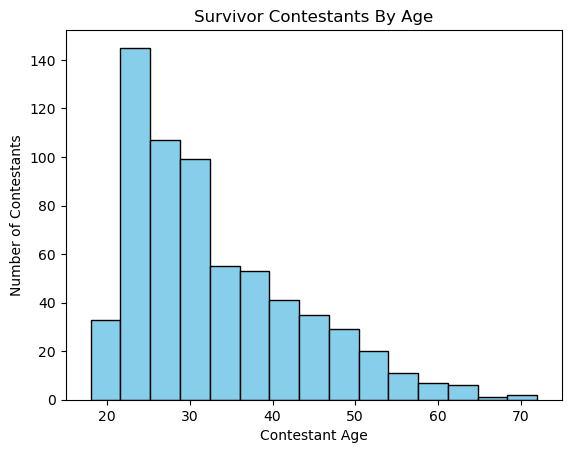

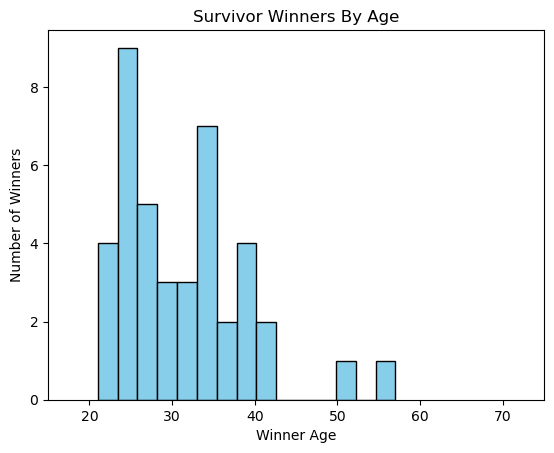

In [458]:
plt.hist(unique_contestants.age, bins=15, color='skyblue', edgecolor='black')
plt.xlim(15, 75)
plt.xlabel('Contestant Age')
plt.ylabel('Number of Contestants')
plt.title('Survivor Contestants By Age')
plt.show()

plt.hist(unique_winners.age, bins=15, color='skyblue', edgecolor='black')
plt.xlim(15, 75)
plt.xlabel('Winner Age')
plt.ylabel('Number of Winners')
plt.title('Survivor Winners By Age')
plt.show()

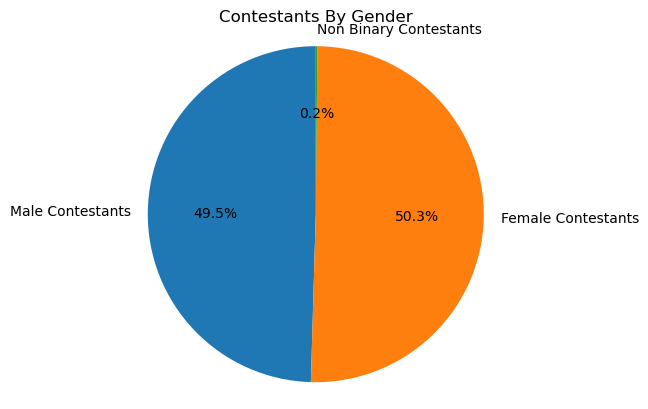

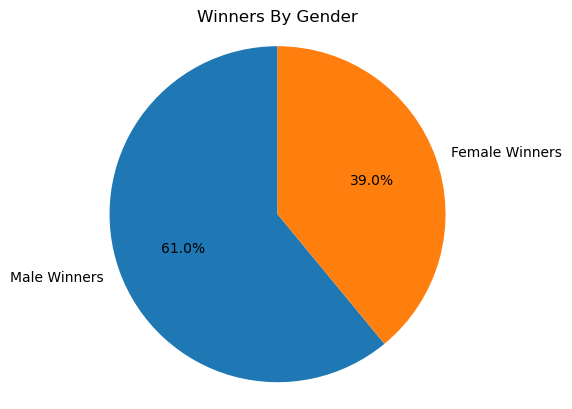

In [459]:
labels = ['Male Contestants', 'Female Contestants', 'Non Binary Contestants']
sizes = [unique_contestants.gender_M.sum(), unique_contestants.gender_F.sum(), unique_contestants.gender_N.sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Contestants By Gender")
plt.axis('equal')
plt.show()

labels = ['Male Winners', 'Female Winners']
sizes = [unique_winners.gender_M.sum(), unique_winners.gender_F.sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Winners By Gender")
plt.axis('equal')
plt.show()

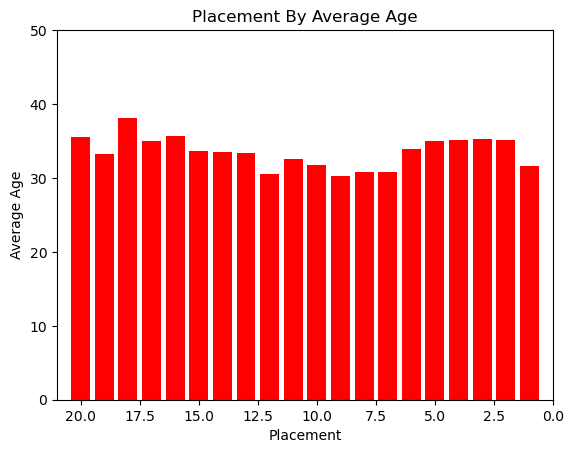

In [464]:
placement_by_age = contestant_table.groupby('finish')['age'].mean()
plt.bar(placement_by_age.index, placement_by_age, color='red')
plt.ylim(0, 50)
plt.xlim(21,0)
plt.xlabel('Placement')
plt.ylabel('Average Age')
plt.title('Placement By Average Age')
plt.show()

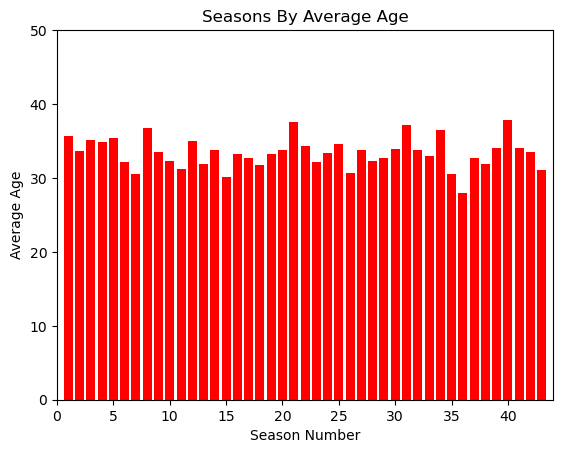

In [468]:
season_by_age = contestant_table.groupby('num_season')['age'].mean()
plt.bar(season_by_age.index, season_by_age, color='red')
plt.ylim(0, 50)
plt.xlim(0, 44)
plt.xlabel('Season Number')
plt.ylabel('Average Age')
plt.title('Seasons By Average Age')
plt.show()

In [515]:
winners_by_state = unique_winners.state.value_counts()
contestants_by_state = unique_contestants.state.value_counts()
print(contestants_by_state.head())
print(unique_contestants[unique_contestants['state'] == 'Ontario'])
print(winners_by_state.head())

California       164
New York          60
Florida           39
Texas             38
Massachusetts     22
Name: state, dtype: int64
     contestant_name  age      hometown              profession  num_season  \
748  Erika Casupanan   32  Toronto,  ON  Communications Manager          41   
761      Omar Zaheer   31   Whitby,  ON            Veterinarian          42   
766  Maryanne Oketch   24     Ajax,  ON        Seminary Student          42   

     finish  african_american  asian_american  latin_american  poc  ...  \
748       1                 0               1               0    1  ...   
761       6                 0               1               0    1  ...   
766       1                 1               0               0    1  ...   

     tribe3  quit  evac ejected fmc  num_jury_votes normalized_finish  \
748     NaN     0     0       0   0             7.0          0.944444   
761     NaN     0     0       0   0             NaN          0.666667   
766     NaN     0     0       0 

In [590]:
y = contestant_table.finish
features = ['age', 'african_american', 'asian_american', 'latin_american', 'poc', 'jewish', 'muslim', 'lgbt']
X = contestant_table[features]

In [591]:
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', DecisionTreeRegressor(max_leaf_nodes=500, random_state = 1))
                             ])
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores With Decision Tree Regressor:\n", scores)

MAE scores With Decision Tree Regressor:
 [4.61655781 5.32216315 5.49908863 5.06834496 5.63698615]
